In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part I: Randomized Sales Data Generation (NumPy)

### 1. Initialize Random Seed
- Use the `roll_no` variable as the random seed to ensure reproducibility.

### 2. Generate Sales Data
- Create a NumPy array of random sales data for 12 months with the shape `(12, 4)`.
- Each column represents a product category:
    - **Electronics**
    - **Clothing**
    - **Home & Kitchen**
    - **Sports**
- Sales values should range between **1000** and **5000** units per month.
- The randomization should be controlled using the initialized seed.

### 3. Convert to DataFrame
- Convert the generated NumPy array into a Pandas DataFrame with:
    - **Columns**: Electronics, Clothing, Home & Kitchen, Sports
    - **Index**: Months from **Jan** to **Dec**

In [3]:
roll_no=102367013
np.random.seed(roll_no)

In [ ]:
data = np.random.randint(1000, 5000, size=(12, 4))
columns=['Electronics','Clothing','Home & Kitchen','Sports']
index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [5]:
df=pd.DataFrame(data,columns=columns,index=index)
df

,Electronics,Clothing,Home & Kitchen,Sports
Jan,1291,2496,2042,4239
Feb,1016,2540,1742,3523
Mar,4567,4084,1942,1543
Apr,1404,4805,4845,2732
May,2083,1858,2351,1838
Jun,2079,1485,4360,2484
Jul,4872,4967,4225,4634
Aug,4192,1093,3518,1493
Sep,2670,3400,3833,1356
Oct,3384,2890,1773,1350


# Part II: Data Manipulation and Analysis (Pandas)

### 1. Display the First 5 Rows and Summary Statistics of the DataFrame
- Use the `head()` method to display the first 5 rows of the DataFrame.
- Use the `describe()` method to generate summary statistics.

### 2. Calculate Total Sales
- **Per Category**: Sum the sales for each category across all months.
- **Per Month**: Sum the sales for all categories for each month.

### 3. Calculate Average Sales Growth
- Compute the average percentage growth in sales between consecutive months for each category.

### 4. Add New Columns
- **Total Sales**: Add a column that represents the sum of all categories for each month.
- **Growth Rate**: Add a column that calculates the percentage change in Total Sales from the previous month.

### 5. Apply a Randomized Discount
- **Condition**: Check if the roll number is even or odd.
    - If **even**, apply a 10% discount to the Electronics category.
    - If **odd**, apply a 15% discount to the Clothing category.
- Update the DataFrame to reflect the discounted values.

In [6]:
df.head()

,Electronics,Clothing,Home & Kitchen,Sports
Jan,1291,2496,2042,4239
Feb,1016,2540,1742,3523
Mar,4567,4084,1942,1543
Apr,1404,4805,4845,2732
May,2083,1858,2351,1838


In [7]:
df.describe()

,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,3003.000000,3015.583333,3342.916667,2292.416667
std,1432.395006,1358.940460,1278.852572,1235.987751
min,1016.000000,1093.000000,1742.000000,1010.000000
25%,1910.250000,1870.000000,2017.000000,1354.500000
50%,3027.000000,2715.000000,3675.500000,1690.500000
75%,4285.750000,4236.750000,4409.000000,2929.750000
max,4872.000000,4967.000000,4928.000000,4634.000000


In [8]:
#total sales in each category
df.sum(axis=0)

Electronics       36036
Clothing          36187
Home & Kitchen    40115
Sports            27509
dtype: int64

In [9]:
#total sales in each month
df.sum(axis=1)

Jan    10068
Feb     8821
Mar    12136
Apr    13786
May     8130
Jun    10408
Jul    18698
Aug    10296
Sep    11259
Oct     9397
Nov    15417
Dec    11431
dtype: int64

In [ ]:
# Average sales growth between consecutive months
average_growth = df.pct_change(axis=1).mean() * 100
average_growth

Electronics             NaN
Clothing          27.066594
Home & Kitchen    38.327749
Sports           -17.196281
dtype: float64

In [11]:
df['Total Sales']=df.sum(axis=1)
df['Growth Rate']=df['Total Sales'].pct_change() * 100

In [12]:
df

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,1291,2496,2042,4239,10068,NaN
Feb,1016,2540,1742,3523,8821,-12.385777
Mar,4567,4084,1942,1543,12136,37.580773
Apr,1404,4805,4845,2732,13786,13.595913
May,2083,1858,2351,1838,8130,-41.027129
Jun,2079,1485,4360,2484,10408,28.019680
Jul,4872,4967,4225,4634,18698,79.650269
Aug,4192,1093,3518,1493,10296,-44.935287
Sep,2670,3400,3833,1356,11259,9.353147
Oct,3384,2890,1773,1350,9397,-16.537881


In [13]:
df['Discount'] = df.apply(lambda x: x['Total Sales'] * 0.1 if roll_no % 2 == 0 else x['Total Sales'] * 0.15, axis=1)

In [14]:
df

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate,Discount
Jan,1291,2496,2042,4239,10068,NaN,1510.20
Feb,1016,2540,1742,3523,8821,-12.385777,1323.15
Mar,4567,4084,1942,1543,12136,37.580773,1820.40
Apr,1404,4805,4845,2732,13786,13.595913,2067.90
May,2083,1858,2351,1838,8130,-41.027129,1219.50
Jun,2079,1485,4360,2484,10408,28.019680,1561.20
Jul,4872,4967,4225,4634,18698,79.650269,2804.70
Aug,4192,1093,3518,1493,10296,-44.935287,1544.40
Sep,2670,3400,3833,1356,11259,9.353147,1688.85
Oct,3384,2890,1773,1350,9397,-16.537881,1409.55


# Part III: Visualizations (Matplotlib and Seaborn)

### 1. Plot Monthly Sales Trends
- Use line plots to visualize the monthly sales trends for each product category:
    - **Electronics**
    - **Clothing**
    - **Home & Kitchen**
    - **Sports**
- The x-axis should represent the months, and the y-axis should represent the sales values.

### 2. Sales Distribution Analysis
- Create box plots to show the sales distribution for each product category:
    - Highlight the spread, median, and potential outliers in the sales data.
- Use Seaborn's `boxplot()` function for better aesthetics.

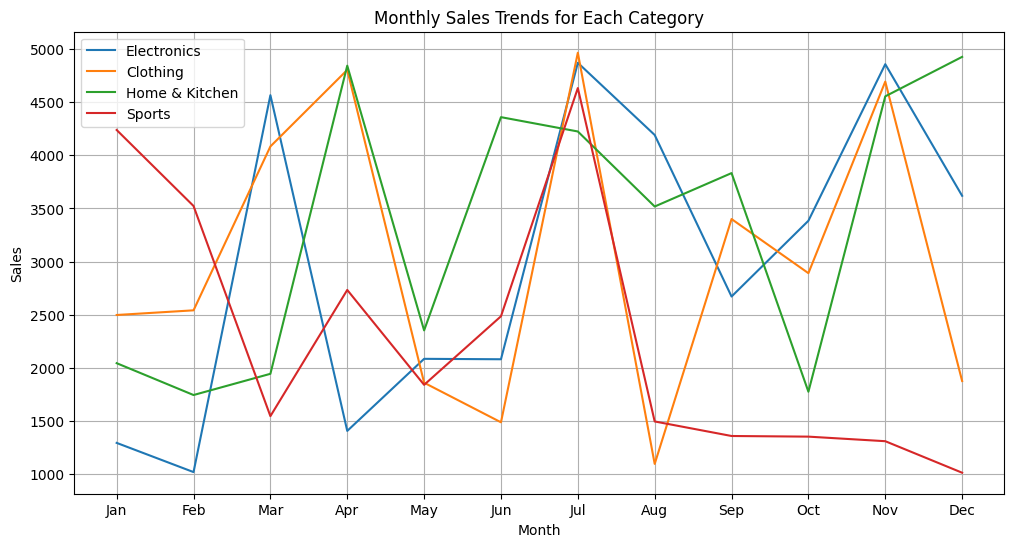

In [15]:
# Plot monthly sales trends for each category
plt.figure(figsize=(12, 6))
for category in columns:
    plt.plot(index, df[category], label=category)
plt.title('Monthly Sales Trends for Each Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


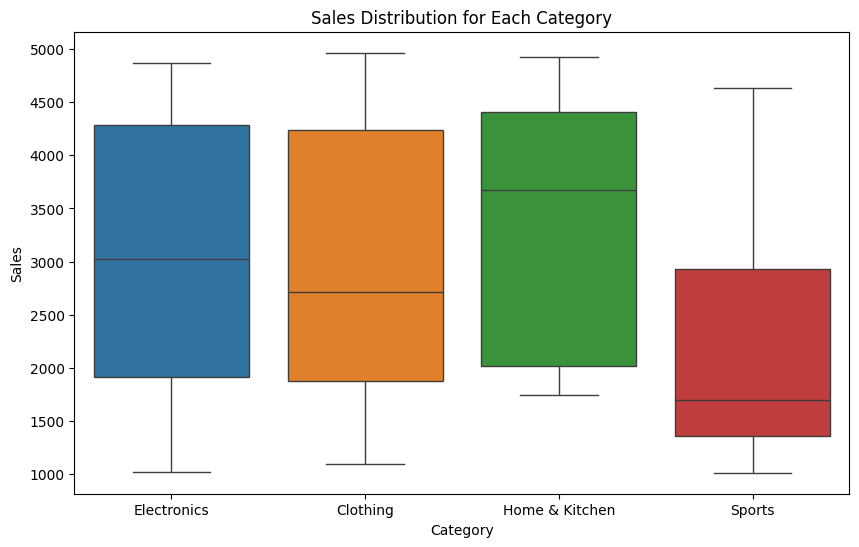

In [16]:

# Box plots to show the sales distribution for each category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns])
plt.title('Sales Distribution for Each Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

### Question 2: Array Analysis

Given the array: 
```python
array = np.array([[1, -2, 3], [-4, 5, -6]])
```

#### i. Element-wise Absolute Value
- Compute the absolute value of each element in the array.

#### ii. Percentiles
- Find the **25th**, **50th**, and **75th** percentiles:
    - For the flattened array.
    - For each column.
    - For each row.

#### iii. Statistical Measures
- Calculate the following:
    - **Mean**, **Median**, and **Standard Deviation**:
        - For the flattened array.
        - For each column.
        - For each row.


In [17]:
# Given array
array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. Element-wise Absolute Value
absolute_values = np.abs(array)
print("Element-wise Absolute Values:\n", absolute_values)


Element-wise Absolute Values:
 [[1 2 3]
 [4 5 6]]


In [18]:

# ii. Percentiles
# Flattened array
percentiles_flattened = {
    "25th": np.percentile(array, 25),
    "50th": np.percentile(array, 50),
    "75th": np.percentile(array, 75)
}
print("\nPercentiles for Flattened Array:", percentiles_flattened)




Percentiles for Flattened Array: {'25th': np.float64(-3.5), '50th': np.float64(-0.5), '75th': np.float64(2.5)}


In [19]:
# For each column
percentiles_columns = {
    "25th": np.percentile(array, 25, axis=0),
    "50th": np.percentile(array, 50, axis=0),
    "75th": np.percentile(array, 75, axis=0)
}
print("\nPercentiles for Each Column:\n", percentiles_columns)




Percentiles for Each Column:
 {'25th': array([-2.75, -0.25, -3.75]), '50th': array([-1.5,  1.5, -1.5]), '75th': array([-0.25,  3.25,  0.75])}


In [20]:
# For each row
percentiles_rows = {
    "25th": np.percentile(array, 25, axis=1),
    "50th": np.percentile(array, 50, axis=1),
    "75th": np.percentile(array, 75, axis=1)
}
print("\nPercentiles for Each Row:\n", percentiles_rows)



Percentiles for Each Row:
 {'25th': array([-0.5, -5. ]), '50th': array([ 1., -4.]), '75th': array([2. , 0.5])}


In [21]:

# iii. Statistical Measures
# Flattened array
stats_flattened = {
    "Mean": np.mean(array),
    "Median": np.median(array),
    "Standard Deviation": np.std(array)
}
print("\nStatistical Measures for Flattened Array:", stats_flattened)




Statistical Measures for Flattened Array: {'Mean': np.float64(-0.5), 'Median': np.float64(-0.5), 'Standard Deviation': np.float64(3.8622100754188224)}


In [22]:
# For each column
stats_columns = {
    "Mean": np.mean(array, axis=0),
    "Median": np.median(array, axis=0),
    "Standard Deviation": np.std(array, axis=0)
}
print("\nStatistical Measures for Each Column:\n", stats_columns)




Statistical Measures for Each Column:
 {'Mean': array([-1.5,  1.5, -1.5]), 'Median': array([-1.5,  1.5, -1.5]), 'Standard Deviation': array([2.5, 3.5, 4.5])}


In [23]:
# For each row
stats_rows = {
    "Mean": np.mean(array, axis=1),
    "Median": np.median(array, axis=1),
    "Standard Deviation": np.std(array, axis=1)
}
print("\nStatistical Measures for Each Row:\n", stats_rows)



Statistical Measures for Each Row:
 {'Mean': array([ 0.66666667, -1.66666667]), 'Median': array([ 1., -4.]), 'Standard Deviation': array([2.05480467, 4.78423336])}


### Question: 3

Given the array:  
```python
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])
```

#### i. Perform the following operations:
1. **Floor Values**: Compute the largest integer less than or equal to each element in the array.
2. **Ceiling Values**: Compute the smallest integer greater than or equal to each element in the array.
3. **Truncated Values**: Remove the fractional part of each element in the array.
4. **Rounded Values**: Round each element to the nearest integer.

In [24]:
a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
a

array([-1.8, -1.6, -0.5,  0.5,  1.6,  1.8,  3. ])

In [25]:
#floor
np.floor(a)

array([-2., -2., -1.,  0.,  1.,  1.,  3.])

In [26]:
#ceil
np.ceil(a)

array([-1., -1., -0.,  1.,  2.,  2.,  3.])

In [27]:
#truncate
np.trunc(a)

array([-1., -1., -0.,  0.,  1.,  1.,  3.])

In [28]:
#round
np.round(a)

array([-2., -2., -0.,  0.,  2.,  2.,  3.])

### Question : 4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [29]:
arr=[1,2,3,4,5,6,7,8,9,10]
arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
temp=arr[0]
arr[0]=arr[1]
arr[1]=temp

In [31]:
arr

[2, 1, 3, 4, 5, 6, 7, 8, 9, 10]

### Question 4 : Write a Python program to swap two elements in a set by converƟng it to a list first. 

In [32]:
arr=[1,2,3,4,5,6,7,8,9,10]
arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [33]:
arr[0],arr[1]=arr[1],arr[0]

In [34]:
arr

[2, 1, 3, 4, 5, 6, 7, 8, 9, 10]